In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Chapter 2
# Realistic Projectile Motion
Most of these problems can be easily solved using the Euler Method but can't be solved analytically. 

### 2.1 Bicycle Racing: The Effect of Air Resistance

We begin by examining the bycicle without friction. That is the kind of friction that resists translational movement, not the kind that makes the movement of the bicycle possible! The equation of motion is then

$$\frac{dv}{dt} = \frac{F}{m},$$

where $v$ is the velocity, $m$ is the mass of the bike+rider, $t$ is time (duh), and $F$ is the force on the bicycle. Knowing exactly what $F$ is can be difficult since the force exerted by the rider is applied to the wheels via the pedals, gears, etc. Instead consider the power generated by the rider. Studies show that professional bikers can output 400 watts of power over approximately one hour. Using work-energy ideas, the previous equation can be rewritten

$$\frac{dE}{dt} = P$$

I'm not exactly how that was reformulated, but I think it has something to do with the fact that a change in velocity equates to a change in energy. The work-energy theorem is that change in energy equals work. Then work over time must be power, and $dE/dt = P$. In any event,on a flat road, $E$ is entirely kinetic energy, so $E=\frac{1}{2}mv^2$ and $dE/dt = mv(dv/dt)$ by the chain rule. Subbing that into the above equation gives

$$\frac{dv}{dt} = \frac{P}{mv}. $$

If we assume that $P$ is a constant, we can solve the above equation via separation of variables (I think).

$$\int\limits_{v_0}^v v'dv' = \int\limits_0^t \frac{P}{m}dt', $$

where $v_0$ is the velocity at time $t=0$. Integrate both sides and solve for $v$.

$$v = \sqrt{v_0^2 + 2Pt/m}.$$

This equation says the the rider's velocity increases without bound, so we know that it isn't entirely correct. To correct this we need to add another term that account for air resistance in the equation of motion, but first let's try and solve (2.3) numerically. Begin with the finite difference form for the derivative of the velocity. 

$$ \frac{dv}{dt} \approx \frac{v_{i+1}-v_i}{\Delta t}.$$

Insert this into (2.3) and rearrange a little bit to get

$$v_{i+1} = v_i + \frac{P}{mv_i}\Delta t.$$

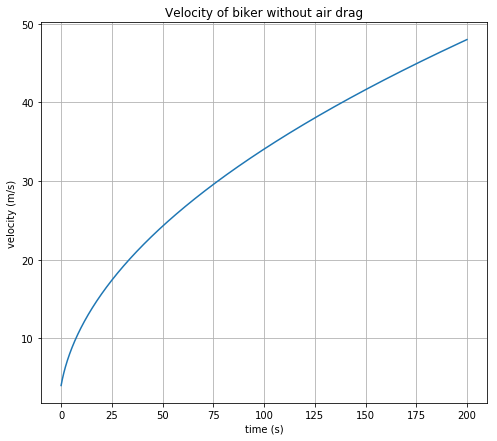

In [14]:
# Initialize variables
P = 400    # Watts
m = 70     # kg
v0 = 4     # m/s
t0 = 0     # initial tim, s
tf = 200   # final time
dt = 1/10  # time step


# Create vectors
t = np.arange(t0,tf,dt)
v = np.zeros(t.size)
v[0] = v0

# Compute numerical solution
for i in range(v.size-1):
    dv = P/(m*v[i])
    v[i+1] = v[i] + dv*dt
    
# Plot solution
fig = plt.figure(figsize=(8,7))
plt.plot(t,v, label='numerical solution')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('Velocity of biker without air drag')
plt.show()

The boundless nature of our solution is now evident. The rider reaches 45 m/s (~200 mph) is less than 3 minutes. Likewise, $v$ doesn't seem to be leveling out at all. Time to add air drag! There is some air drag lost to friction in the deformation of the tires and in something called the hubs, whatever that is, but it's negligable compared to air drag. Air drag is rather complicated, but can be written simply as 

$$F_{drag} = -B_1v-B_2v^2.$$

Note this equation's resemblance to a Taylor Expansion. At low velocities, the first term dominates and its coefficient, $B_1$, can be calculated for simple shapes. This is known as Stoke's Law. For higher, more reasonable velocities, $B_2$ dominated and *cannot* be calculated even for simple objects. It can however be approximated as follows. An object moving through the atmosphere has to push the air in front of it away. The mass of the moved air in an amount of time $dt$ is $m_{air} \sim \rho Avdt$, where $\rho$ is the density of air and $A$ is the "frontal area" (lol) of the object. The air is given a velocity on the order ov $v$ and therefore has a kinetic energy $E_{air} \sim m_{air}v^2/2$. This is also the work done on the object due to the drag force in time *dt*, so $F_{drag}vdt = E_{air}$. Slap it all together, and we get

$$ F_{drag} \approx -\frac{1}{2}C \rho Av^2.$$

$C$ is known as the drag coefficient and the "simple" argument presented predicts that it's equatl to one. I don't really follow that but okay. In reality, $C$ depends on the aerodynamics of the object and can be determined with wind tunnel measurements. In any event, we can now include this drag force into our equation, which becomes

$$ v_{i+1} = v_i + \frac{P}{mv_i}\Delta t - \frac{C\rho Av_i^2}{2m}\Delta t,$$

We can now use the Euler Method once again to solve for the velocity of the rider, this time including the drag force. We will use $A = 0.33$ m$^2$, which is a typical estimate for a racer in a crouch. $C$ and $\rho$ are not given, so I'm going to assume $C = 1$ and use the density of air, which is $\rho = 1.225$ kg/m$^3$.

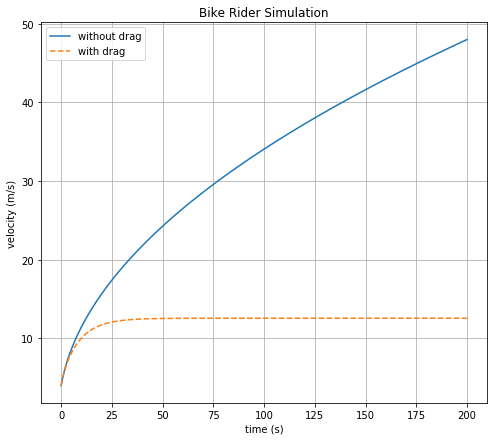

In [26]:
# Initialize variables
P = 400     # Watts
m = 70      # kg
A = 0.33    # frontal area, m^2
C = 1       # drag coefficient
rho = 1.225 # density of air, kg/m^3
v0 = 4      # m/s
t0 = 0      # initial tim, s
tf = 200    # final time
dt = 1/10   # time step


# Create vectors
t = np.arange(t0,tf,dt)
v = np.zeros(t.size)     # velocity without drag
vDrag = np.zeros(t.size) # velocity with drag
v[0] = v0
vDrag[0] = v0

# Compute numerical solution
for i in range(v.size-1):
    dv = P/(m*v[i])
    dvDrag = P/(m*vDrag[i]) - (C*rho*A*vDrag[i]**2/(2*m))
    
    v[i+1] = v[i] + dv*dt
    vDrag[i+1] = vDrag[i] + dvDrag*dt
    
# Plot solution
fig = plt.figure(figsize=(8,7))
plt.plot(t,v, label='without drag')
plt.plot(t,vDrag,'--', label='with drag')
plt.grid()
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('Bike Rider Simulation')
plt.show()

It looks like Nakanishi and Giordano made a smaller assumption for $C$ than I did, but I think that's a trivial issue. $C$ has the effect of moving the terminal velocity up or down. 

### 2.2 Projectile Motion: The Trajectory of a Cannon Shell